## Predicting Student Grades

Data source: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('archive/student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Data Visualization

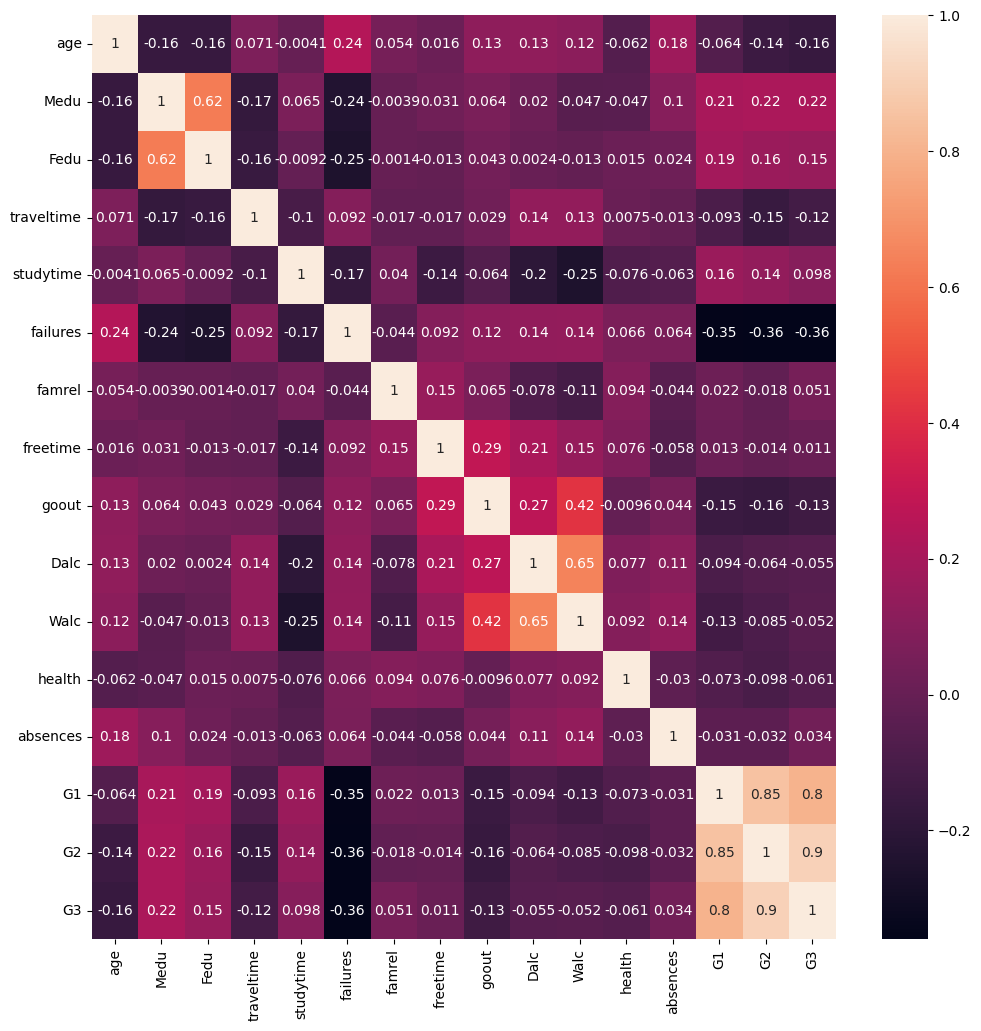

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

### Preprocessing

In [12]:
# Checking for missing values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Encoding

In [13]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [15]:
nonnumeric_columns = [ data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
nonnumeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [18]:
data['Mjob'] = data['Mjob'].apply(lambda x: 'm_' + x)
data['Fjob'] = data['Fjob'].apply(lambda x: 'f_' + x)
data['reason'] = data['reason'].apply(lambda x: 'r_' + x)
data['guardian'] = data['guardian'].apply(lambda x: 'g_' + x)

In [19]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,m_services,f_services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,m_services,f_services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,m_other,f_other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,m_services,f_other,...,4,4,1,3,4,5,0,11,12,10


In [23]:
dummies = pd.concat([pd.get_dummies(data['Mjob']), 
                     pd.get_dummies(data['Fjob']), 
                     pd.get_dummies(data['reason']),
                     pd.get_dummies(data['guardian'])], 
                     axis=1)

dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
4,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True
391,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False
392,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True
393,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False


In [24]:
data = pd.concat([data, dummies], axis = 1)
data.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

In [25]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,GP,F,17,U,GT3,T,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,GP,F,15,U,LE3,T,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,GP,F,15,U,GT3,T,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,GP,F,16,U,GT3,T,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,False,True,False,True,False,False,False,False,False,True
391,MS,M,17,U,LE3,T,3,1,2,1,...,False,True,False,True,False,False,False,False,True,False
392,MS,M,21,R,GT3,T,1,1,1,1,...,True,False,False,True,False,False,False,False,False,True
393,MS,M,18,R,LE3,T,3,2,3,1,...,True,False,False,True,False,False,False,False,True,False


In [27]:
nonnumeric_columns = [ data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']

for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [28]:
encoder = LabelEncoder()

for column in nonnumeric_columns:
    data[column] = encoder.fit_transform(data[column])

In [30]:
for dtype in data.dtypes:
    print(dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool
bool


#### Scaling

In [31]:
y = data['G3']
X = data.drop('G3', axis=1)

In [32]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [33]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,0,0,15,1,1,1,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,False,True,False,True,False,False,False,False,False,True
391,1,1,17,1,1,1,3,1,2,1,...,False,True,False,True,False,False,False,False,True,False
392,1,1,21,0,0,1,1,1,1,1,...,True,False,False,True,False,False,False,False,False,True
393,1,1,18,0,1,1,3,2,3,1,...,True,False,False,True,False,False,False,False,True,False


In [34]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,-0.363050,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,...,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.363050,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.363050,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.363050,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,...,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.363050,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,0.535392,1.570004,-2.938392,-0.685387,-0.479857,-0.643249,-0.042286,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
391,2.754443,1.054656,0.238380,0.535392,1.570004,0.340322,0.229234,-1.399970,0.792251,-1.235351,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
392,2.754443,1.054656,3.377047,-1.867789,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-1.235351,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
393,2.754443,1.054656,1.023046,-1.867789,1.570004,0.340322,0.229234,-0.479857,2.227751,-1.235351,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908


### Training

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=44)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Results

In [39]:
print(f"Model R2: {model.score(X_test, y_test)}")

Model R2: 0.8211166870329769
